# 6.6 Melbourne Housing Project - Time Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

## 01. Importing libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 6 Advanced Analytics and Dashboard Designs\07-05-2022 Melbourne Housing Analysis\02 Data\Prepared Data'

In [4]:
# Importing previously cleaned housing data

df_housing = pd.read_pickle(os.path.join(path, '6.1_melb_housing_clean_data_new.pkl'))

In [5]:
df_housing.columns

Index(['Date Sold', 'Price', 'Year Built', 'Land Size', 'Property Area Size',
       'Property Type', 'Num of Rooms', 'Num of Bathrooms',
       'Num of Car Spaces', 'Distance to CBD', 'Suburb', 'Postcode',
       'Council Area', 'Council Area1', 'Latitude', 'Longitude', 'Region',
       'Property Vicinity Count'],
      dtype='object')

In [6]:
data = df_housing[['Date Sold', 'Price']]

In [7]:
data.head()

,Date Sold,Price
1,3/12/2016,1480000.0
2,4/02/2016,1035000.0
4,4/03/2017,1465000.0
5,4/03/2017,850000.0
6,4/06/2016,1600000.0


In [8]:
data.shape

(15359, 2)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.dtypes

Date Sold     object
Price        float64
dtype: object

In [11]:
# Convert 'Date Sold' column data type to float 
#data['Date Sold'] = pd.to_numeric(data['Date Sold'],errors = 'coerce')

In [12]:
data.dtypes

Date Sold     object
Price        float64
dtype: object

In [13]:
# Convert 'Date Sold' column data type to datetime format

data['Date Sold'] = pd.to_datetime(data['Date Sold'])

In [14]:
data.dtypes

Date Sold    datetime64[ns]
Price               float64
dtype: object

In [15]:
data.head()

,Date Sold,Price
1,2016-03-12,1480000.0
2,2016-04-02,1035000.0
4,2017-04-03,1465000.0
5,2017-04-03,850000.0
6,2016-04-06,1600000.0


In [16]:
# Sort 'Date Sold' by ascending order

data.sort_values(by='Date Sold', inplace=True)

In [17]:
data.head()

,Date Sold,Price
10127,2016-01-28,813000.0
10128,2016-01-28,1205000.0
8104,2016-03-09,900000.0
6957,2016-03-09,380500.0
10634,2016-03-09,1325000.0


In [18]:
# Set the "Date" column as the index

from datetime import datetime

data['DateTime'] = pd.to_datetime(data['Date Sold']) # Create a datetime column from "Date.""
data = data.set_index('DateTime') # Set the datetime as the index of the dataframe.
data.drop(['Date Sold'], axis=1, inplace=True) # Drop the "Date" column.
data.head()

,Price
DateTime,
2016-01-28,813000.0
2016-01-28,1205000.0
2016-03-09,900000.0
2016-03-09,380500.0
2016-03-09,1325000.0


In [19]:
data.dtypes

Price    float64
dtype: object

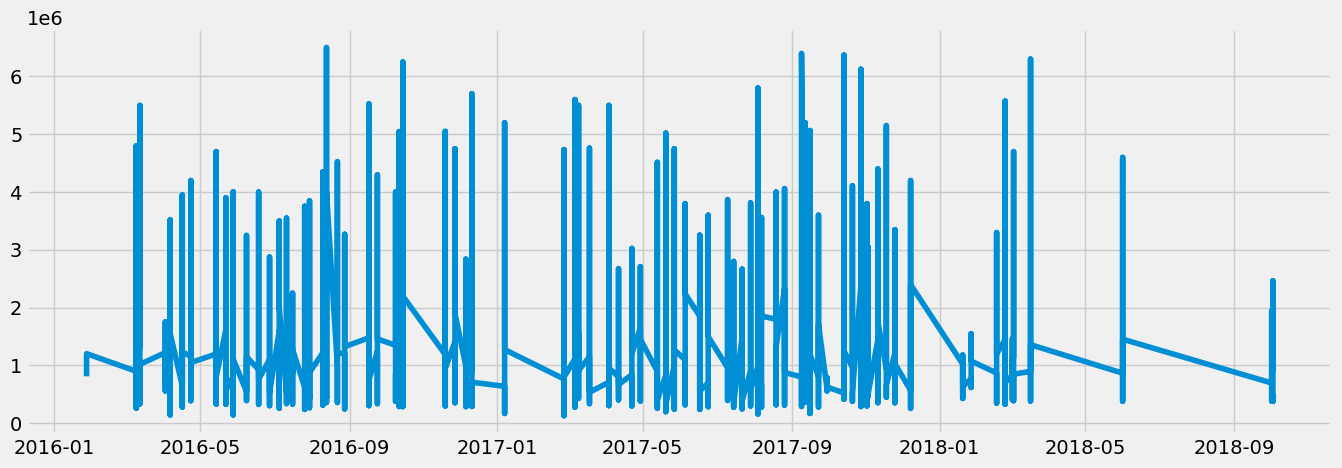

In [20]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

## 02. Clean time-series data

In [21]:
# Check for missing values (you shouldn't have any)

data.isnull().sum() 

Price    0
dtype: int64

In [22]:
# Check for duplicates

dups = data.duplicated()
dups.sum()


13041

In [23]:
# Create a new dataframe that doesn’t include the duplicates:

data1 = data.drop_duplicates()

In [24]:
# Re-Check for duplicates

dups = data1.duplicated()
dups.sum()

# No more dups

0

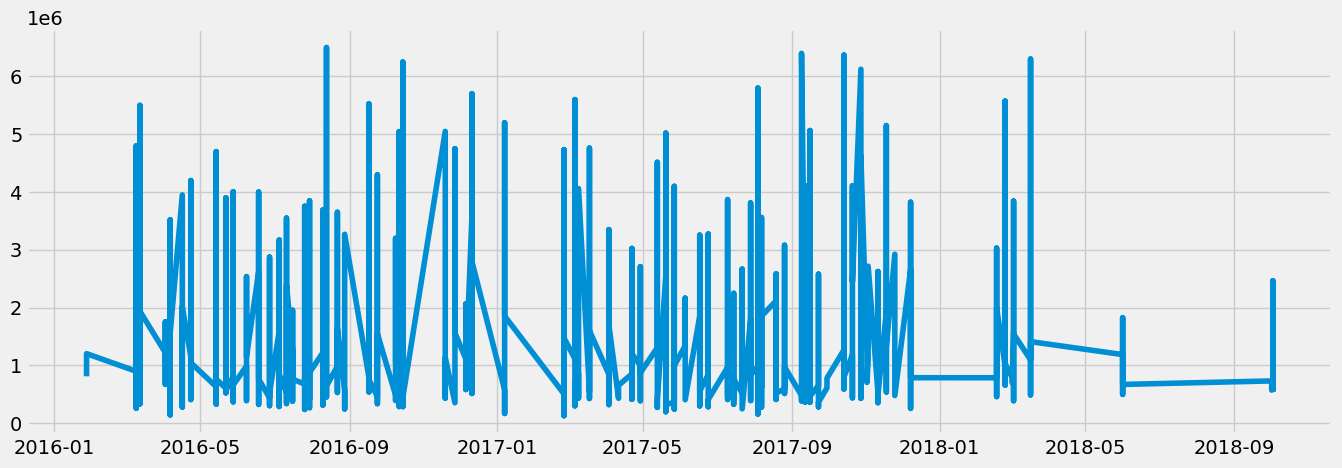

In [149]:
# Re-Plot the data without duplicates using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data1)

## 03. Time-series analysis: decomposition

In [150]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data1, model='additive')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

This error is due to missing data points. This is because the Data column is inconsistent, not exactly missing value, but because the date of the property collected are inconsistent, so python consider it as missing data.

In [156]:
decomposition1 = sm.tsa.seasonal_decompose(data1, model='multiplicative', period=1)

In [168]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 8

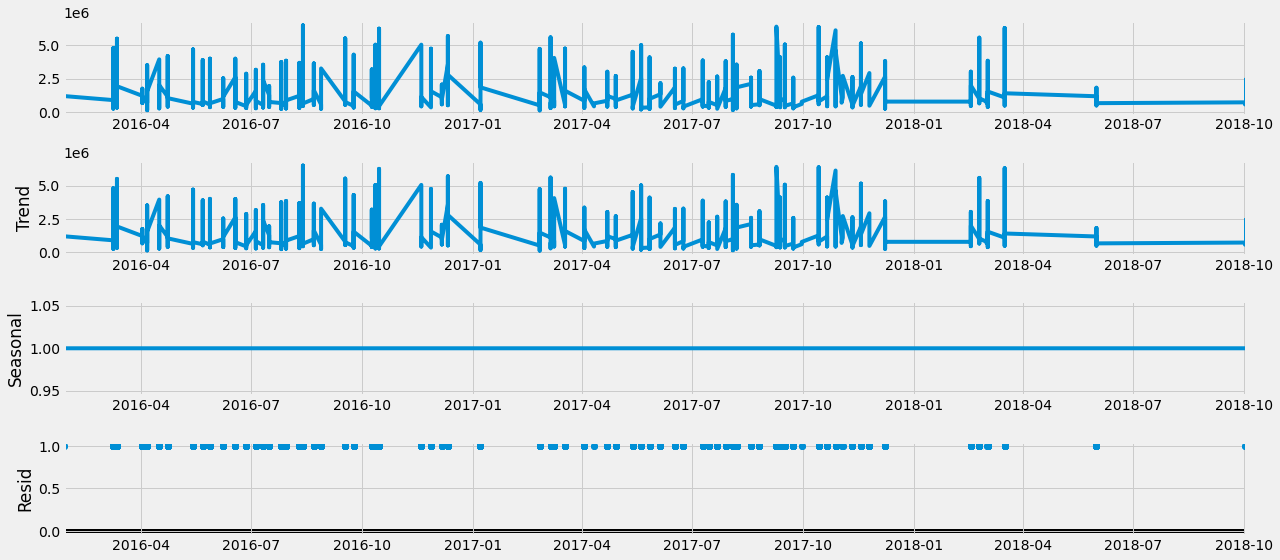

In [169]:
# Plot the separate components

decomposition1.plot()
plt.show()

The breakdown of individual components of time series shows there is seasonality or noise to the data as seen by the horizontal line and data points.

Here we can observe a cycle component of upward and downward movement of data points and they are not fixed to an even time interval. This observation is from the trend chart. The rises and falls in the visualisation alone implies the series is non-stationary. 

Note: The presence of a trend and seasonality implies the series is non-stationary.

There appears to be a cycle.  However trend and cycle components are difficult to separate because they’re too connected, hence the above decomposition method have them combined.

## 04. Testing for stationarity

In [165]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data1['Value'])

KeyError: 'Value'

In [166]:
data1.dtypes

Price    float64
dtype: object

In [179]:
dickey_fuller(data1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.544302e+01
p-value                        2.848649e-28
Number of Lags Used            6.000000e+00
Number of Observations Used    2.311000e+03
Critical Value (1%)           -3.433183e+00
Critical Value (5%)           -2.862791e+00
Critical Value (10%)          -2.567436e+00
dtype: float64


Test statistic value from Dickey-Fuller test is smaller than the critical value at one, five, and ten percent significance levels meaning I have disprove that there is a unit root, which means the data is stationary. Therefore, I can reject the null hypothesis and proceed with forecast.

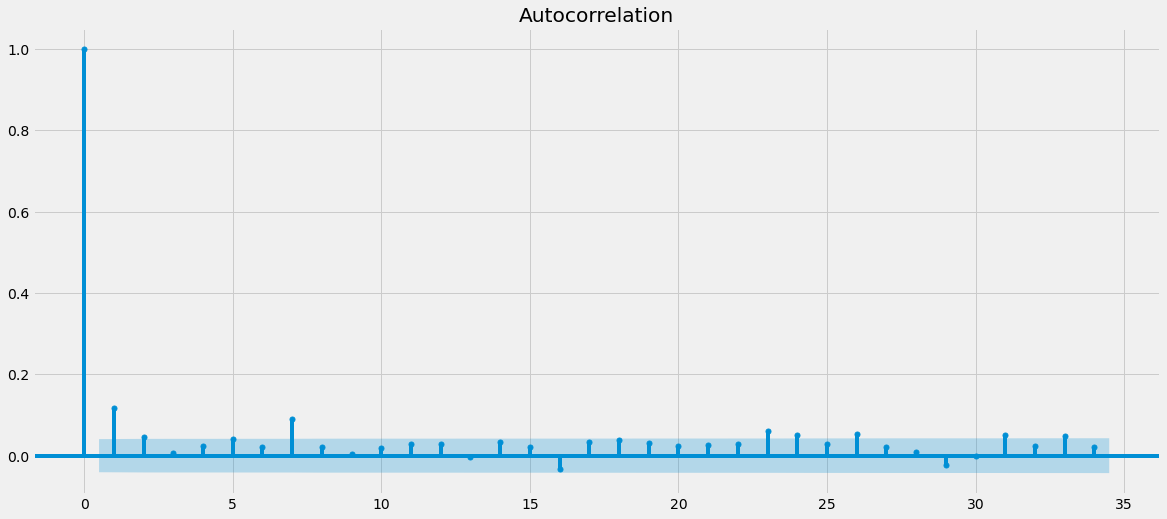

In [170]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data1)
plt.show()

There appears to be not almost no significant autocorrelated data, which means the data set is stationary.

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. 

Since most of the the autocorrelation values are close to zero and are within the blue area, this means most of the lags are not correlated with one another. There is only one lag observation that has a autocorrelation value of 1, which indicates that the lag is significantly correlated with each other.

Based on the Dickey-Fuller test, we can conclude the data set is stationary, therefore I can proceed with forecast analysis.